In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

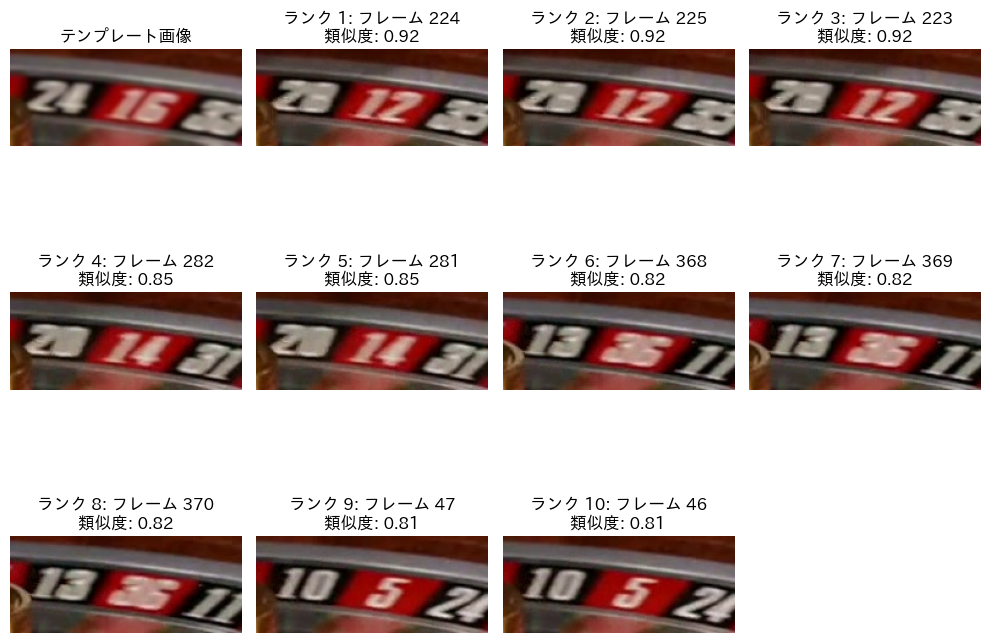

In [26]:
# ディレクトリの存在を確認し、なければ作成
output_dir = "./images/template"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 類似度を格納するためのリスト
similarities = []

# テンプレート画像をカラーで読み込み
template = cv2.imread('./images/template_test.jpg', cv2.IMREAD_COLOR)
# ぶれ除去
template = cv2.GaussianBlur(template, (5, 5), 0)

# フレーム1から400までの画像を処理
for frame_number in range(1, 401):
    # 画像の読み込み
    frame_path = f"../../media/frame/RouletteVideo_20240224/frame_{frame_number}.jpg"
    frame = cv2.imread(frame_path)
    
    # 画像が存在しない場合はスキップ
    if frame is None:
        print(f"フレーム {frame_number} を読み込めませんでした。")
        continue
    
    # 画像の切り取り
    cropped_frame = frame[560:640, 1170:1360]
    
    # 切り取った画像の保存
    cropped_frame_path = f"{output_dir}/cropped_template_{frame_number}.jpg"
    cv2.imwrite(cropped_frame_path, cropped_frame)
    
    # 類似度の計算
    similarity = cv2.matchTemplate(cropped_frame, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(similarity)
    similarities.append((frame_number, max_val))

# 上位10位の画像とフレーム番号を可視化
top_10_similarities = sorted(similarities, key=lambda item: item[1], reverse=True)[:10]
top_10_frame_numbers, top_10_similarity_values = zip(*top_10_similarities)

# テンプレート画像の表示
plt.figure(figsize=(10, 8))
plt.subplot(3, 4, 1)
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.title('テンプレート画像')
plt.axis('off')

# 上位10位の切り取った画像と類似度の表示
for index, (frame_number, similarity) in enumerate(zip(top_10_frame_numbers, top_10_similarity_values), start=2):
    cropped_frame_path = f"{output_dir}/cropped_template_{frame_number}.jpg"
    cropped_frame = cv2.imread(cropped_frame_path)
    plt.subplot(3, 4, index)
    plt.imshow(cv2.cvtColor(cropped_frame, cv2.COLOR_BGR2RGB))
    plt.title(f'ランク {index-1}: フレーム {frame_number}\n類似度: {similarity:.2f}')
    plt.axis('off')

plt.tight_layout()
plt.show()
